# Data Visualizations 

# Group 1 - Project 1

## Setup

#### Overview of plots

In this notebook we take the Fed Fund Rate, S&P500, NASDAQ, and DowJones data pulled, cleaned and sorted 
- Line graph: Fed Funds vs Time
- Line graphs: S&P500 Index Valuation vs Time
- Line graphs: NASDAQ Index Valuation vs Time
- Line graphs: DowJones Index Valuation vs Time
- Line graph: All Valuations vs Time
- Line graph: All Percent Change Valuations vs Time
- Box Plots: S&P500 Percent Change
- Box Plots: NASDAQ Percent Change
- Box Plots: DowJones Percent Change
- Regression Lines:
    - Regression Line: Fed Funds Rate vs S&P500 Value, Fed Funds Rate % Change vs S&P500 Value, Fed Funds Rate vs S&P500 % Change, Fed Funds Rate % Change vs S&P500 % Change
    - Regression Line: Fed Funds Rate vs NASDAQ Value, Fed Funds Rate % Change vs NASDAQ Value, Fed Funds Rate vs NASDAQ % Change, Fed Funds Rate % Change vs NASDAQ % Change
    - Regression Line: Fed Funds Rate vs DowJones Value, Fed Funds Rate % Change vs DowJones Value, Fed Funds Rate vs DowJones % Change, Fed Funds Rate % Change vs DowJones % Change
- Independent T-Tests & Correlation Coefficent
    - Fed Funds Rate % Change vs S&P500 % Change
    - Fed Funds Rate % Change vs NASDAQ % Change 
    - Fed Funds Rate % Change vs DowJones % Change

In [54]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as st
from scipy.stats import linregress
import requests
import json
import pprint
from FedConfig import api_key

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [55]:
# Import Data from G1P1 Analysis notebook
# Import combined index csv
combined_index_path = 'resources/combined_index_df.csv'
ci_df = pd.read_csv(combined_index_path, encoding = 'UTF-8')
ci_df

,Date,Fed Funds Rate,NASDAQ Value,S&P 500 Value,DowJones Value,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change,Fed Funds Rate Percent Change,S&P 500 Value Change,NASDAQ Value Change,DowJones Value Change,Fed Funds Rate Value Change
0,2013-04-01,0.15,3251.351818,1570.70,14675.91,0.46922,1.28146,1.78698,7.14286,19.873273,15.184818,257.651091,0.01
1,2013-05-01,0.11,3440.375455,1639.84,15172.18,5.81369,4.40188,3.38154,-26.66667,69.140455,189.023636,496.271364,-0.04
2,2013-06-01,0.09,3416.741500,1618.77,15035.75,-0.68696,-1.28489,-0.89918,-18.18182,-21.070227,-23.633955,-136.425955,-0.02
3,2013-07-01,0.09,3559.710909,1668.68,15390.21,4.18438,3.08277,2.35743,0.00000,49.902955,142.969409,354.456864,0.00
4,2013-08-01,0.08,3639.928636,1670.09,15195.35,2.25349,0.08499,-1.26615,-11.11111,1.418182,80.217727,-194.863636,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2022-09-01,2.56,11402.850000,3850.52,30649.56,-9.28708,-7.40743,-7.14946,9.87124,-308.042567,-1167.410435,-2360.005259,0.23
114,2022-10-01,3.08,10801.494286,3726.05,30570.68,-5.27373,-3.23254,-0.25735,20.31250,-124.469524,-601.355714,-78.875714,0.52
115,2022-11-01,3.78,10973.638095,3917.49,33417.96,1.59370,5.13782,9.31374,22.72727,191.437619,172.143810,2847.274286,0.70
116,2022-12-01,4.10,10838.995714,3912.38,33482.26,-1.22696,-0.13038,0.19241,8.46561,-5.107619,-134.642381,64.299048,0.32


## Data Analysis Graphs

#### Line Graph: Fed Funds Rate 

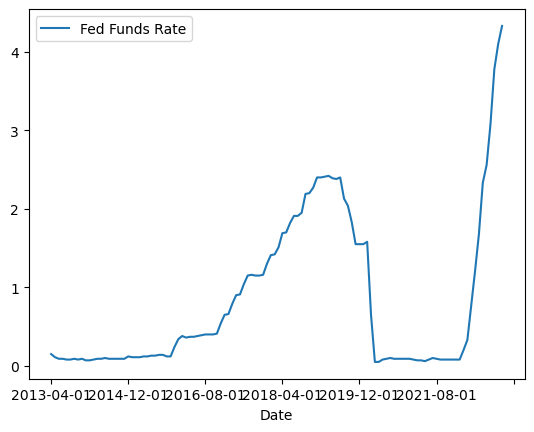

In [90]:
# Plot FedFunds dataframe
ci_df.plot(x='Date', y='Fed Funds Rate', kind='line')
plt.show()

#### Line Graphs: S&P 500 Index Valuation vs Time

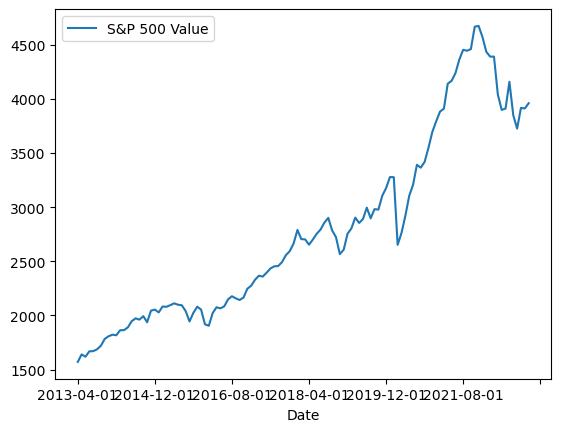

In [85]:
# Plot SP500 Valuation DataFrame
ci_df.plot(x= 'Date', y='S&P 500 Value', kind='line')
plt.show()

#### Line Graphs: NASDAQ Index Valuation vs Time

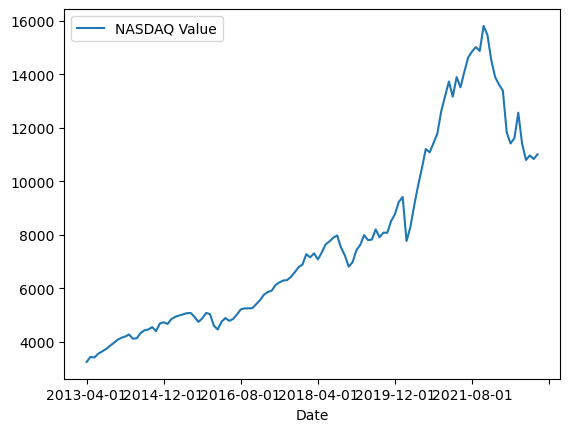

In [87]:
# Plot NASDAQ DataFrame
ci_df.plot(x= 'Date', y='NASDAQ Value', kind='line')
plt.show()

#### Line Graphs: DowJones Index Valuation vs Time

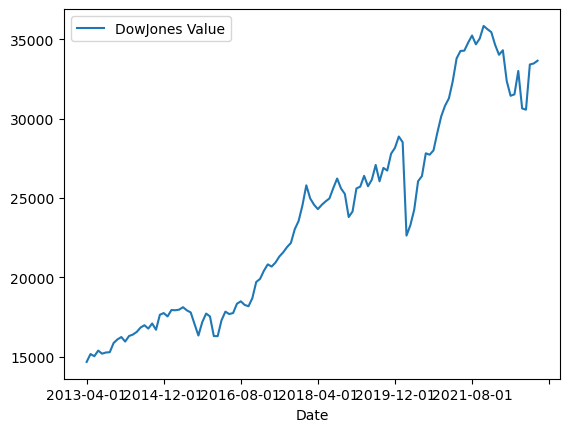

In [89]:
# Plot DowJones DataFrame
ci_df.plot(x= 'Date', y='DowJones Value', kind='line')
plt.show()

#### All Index Plot (2013)


In [93]:
ci_df

,Date,Fed Funds Rate,NASDAQ Value,S&P 500 Value,DowJones Value,NASDAQ Percent Change,S&P 500 Percent Change,DowJones Percent Change,Fed Funds Rate Percent Change,S&P 500 Value Change,NASDAQ Value Change,DowJones Value Change,Fed Funds Rate Value Change
0,2013-04-01,0.15,3251.351818,1570.70,14675.91,0.46922,1.28146,1.78698,7.14286,19.873273,15.184818,257.651091,0.01
1,2013-05-01,0.11,3440.375455,1639.84,15172.18,5.81369,4.40188,3.38154,-26.66667,69.140455,189.023636,496.271364,-0.04
2,2013-06-01,0.09,3416.741500,1618.77,15035.75,-0.68696,-1.28489,-0.89918,-18.18182,-21.070227,-23.633955,-136.425955,-0.02
3,2013-07-01,0.09,3559.710909,1668.68,15390.21,4.18438,3.08277,2.35743,0.00000,49.902955,142.969409,354.456864,0.00
4,2013-08-01,0.08,3639.928636,1670.09,15195.35,2.25349,0.08499,-1.26615,-11.11111,1.418182,80.217727,-194.863636,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2022-09-01,2.56,11402.850000,3850.52,30649.56,-9.28708,-7.40743,-7.14946,9.87124,-308.042567,-1167.410435,-2360.005259,0.23
114,2022-10-01,3.08,10801.494286,3726.05,30570.68,-5.27373,-3.23254,-0.25735,20.31250,-124.469524,-601.355714,-78.875714,0.52
115,2022-11-01,3.78,10973.638095,3917.49,33417.96,1.59370,5.13782,9.31374,22.72727,191.437619,172.143810,2847.274286,0.70
116,2022-12-01,4.10,10838.995714,3912.38,33482.26,-1.22696,-0.13038,0.19241,8.46561,-5.107619,-134.642381,64.299048,0.32


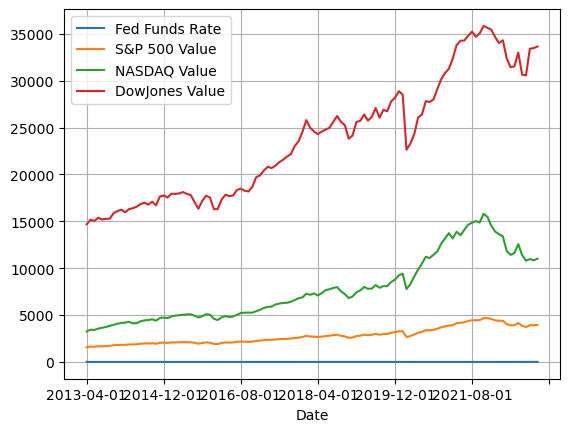

In [96]:
# Plot Indexs (2013-YTD)
ytd_df = ci_df[['Date', 'Fed Funds Rate', 'S&P 500 Value', 'NASDAQ Value', 'DowJones Value']]
fig, ax = plt.subplots()
ytd_df.plot(x='Date', kind='line', ax=ax)
plt.grid(True)

#### Combined Index Percent Change

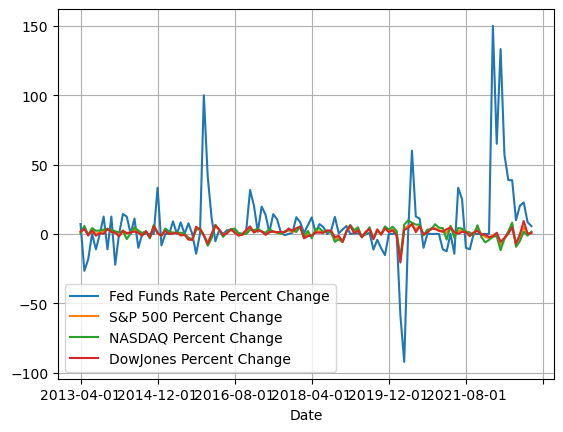

In [97]:
# Plot Indexs (2013-YTD, % Change)
ytd_df = ci_df[['Date', 'Fed Funds Rate Percent Change', 'S&P 500 Percent Change', 'NASDAQ Percent Change', 'DowJones Percent Change']]
fig, ax = plt.subplots()
ytd_df.plot(x='Date', kind='line', ax=ax)
plt.grid(True)

### Box Plot: 


#### Fed Funds Rate Box Plot

<AxesSubplot:>

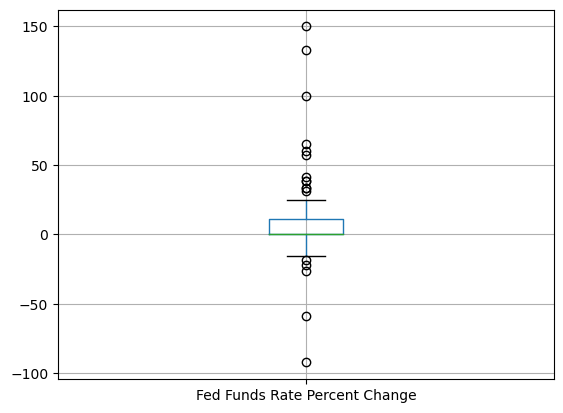

In [99]:
ci_df.boxplot(column = ['Fed Funds Rate Percent Change'])

#### S&P500 Box Plot

<AxesSubplot:>

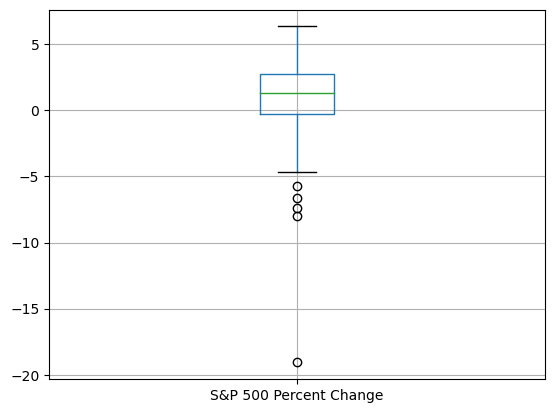

In [98]:
ci_df.boxplot(column = ['S&P 500 Percent Change'])

#### NASDAQ Box Plot

<AxesSubplot:>

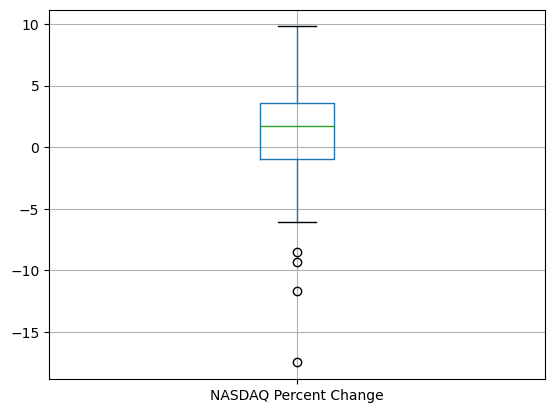

In [100]:
ci_df.boxplot(column = ['NASDAQ Percent Change'])

#### DowJones Box Plot

<AxesSubplot:>

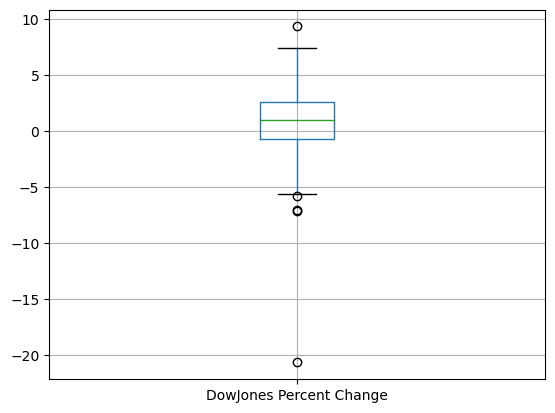

In [101]:
ci_df.boxplot(column = ['DowJones Percent Change'])

---Explanation--

## Statistical Analysis

### Regression Plot Line


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-info">
<b>Fed Funds Rate vs S&P 500
</div>

The r-squared is: 0.055491767788839436


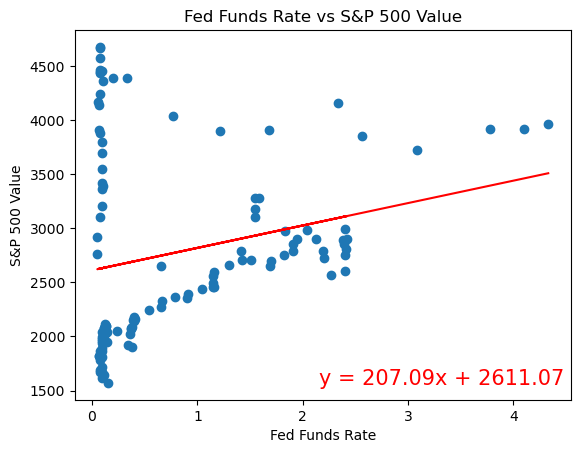

In [56]:
# Plot out Fed Funds Rate vs S&P 500 Value

# Define Values
x_values = ci_df['Fed Funds Rate']
y_values = ci_df['S&P 500 Value']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate')
plt.ylabel('S&P 500 Value')
plt.title('Fed Funds Rate vs S&P 500 Value')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.15, 1550),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.05024208996432443


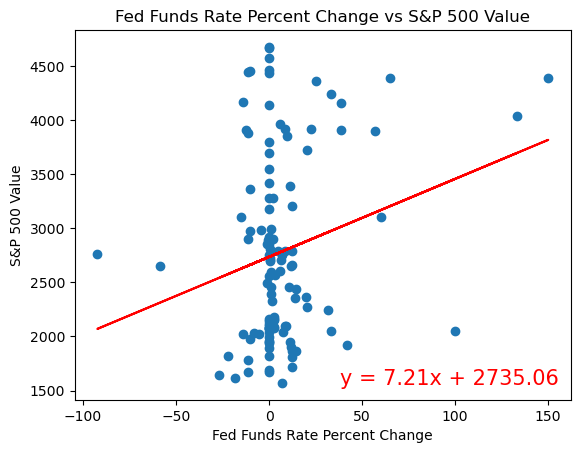

In [57]:
# Plot out Fed Funds Rate Percent Change vs S&P 500 Value

# Define Plot Values
x_values = ci_df['Fed Funds Rate Percent Change']
y_values = ci_df['S&P 500 Value']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate Percent Change')
plt.ylabel('S&P 500 Value')
plt.title('Fed Funds Rate Percent Change vs S&P 500 Value')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38, 1550),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.004937604821536348


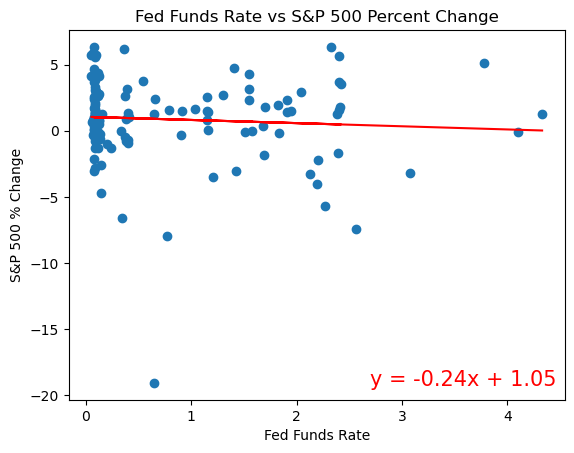

In [58]:
# Plot out Fed Funds Rate vs S&P 500 Percent Change

# Define Plot Values
x_values = ci_df['Fed Funds Rate']
y_values = ci_df['S&P 500 Percent Change']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate')
plt.ylabel('S&P 500 % Change')
plt.title('Fed Funds Rate vs S&P 500 Percent Change')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.70,-19.25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.006898094918180324


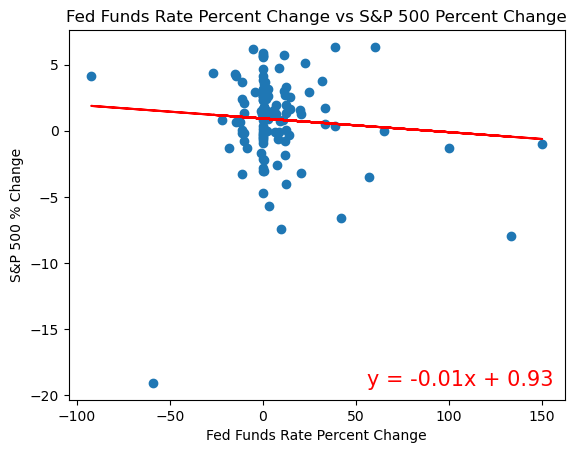

In [59]:
# Plot out Fed Funds Rate Percent Change vs S&P 500 Percent Change

# Define Plot Values
x_values = ci_df['Fed Funds Rate Percent Change']
y_values = ci_df['S&P 500 Percent Change']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate Percent Change')
plt.ylabel('S&P 500 % Change')
plt.title('Fed Funds Rate Percent Change vs S&P 500 Percent Change')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(56, -19.25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

--Explanation--

<div class="alert alert-block alert-info">
<b>Fed Funds Rate vs NASDAQ
</div>

The r-squared is: 0.018076581252054615


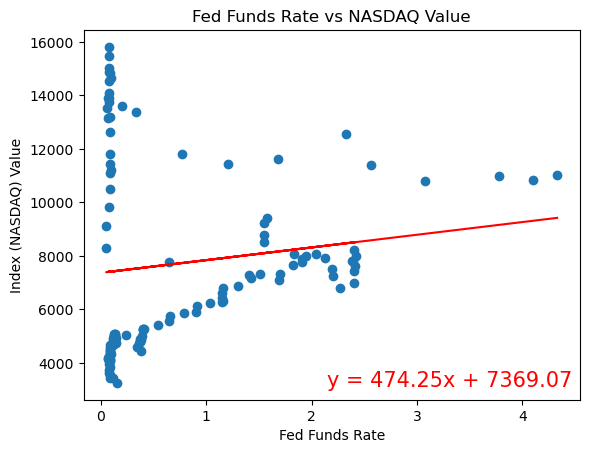

In [60]:
# Plot out Fed Funds Rate vs NASDAQ Value

# Define Values
x_values = ci_df['Fed Funds Rate']
y_values = ci_df['NASDAQ Value']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate')
plt.ylabel('Index (NASDAQ) Value')
plt.title('Fed Funds Rate vs NASDAQ Value')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.15, 3100),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.0323780403524211


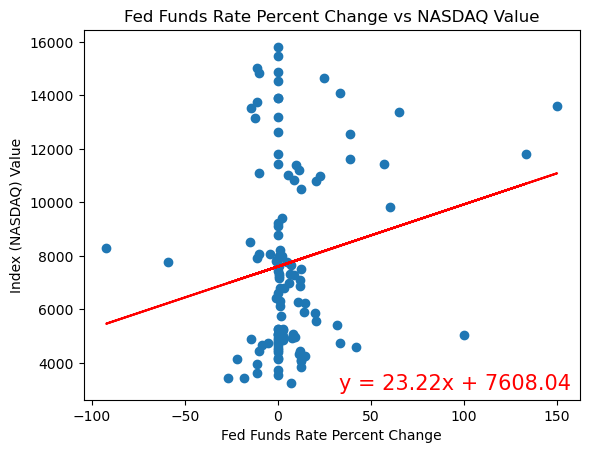

In [61]:
# Plot out Fed Funds Rate Percent Change vs NASDAQ Value

# Define Plot Values
x_values = ci_df['Fed Funds Rate Percent Change']
y_values = ci_df['NASDAQ Value']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate Percent Change')
plt.ylabel('Index (NASDAQ) Value')
plt.title('Fed Funds Rate Percent Change vs NASDAQ Value')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33, 3000),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.012002067546437107


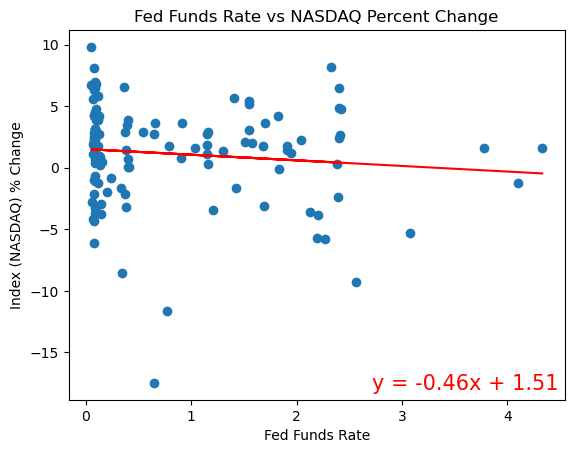

In [62]:
# Plot out Fed Funds Rate vs NASDAQ Percent Change

# Define Plot Values
x_values = ci_df['Fed Funds Rate']
y_values = ci_df['NASDAQ Percent Change']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate')
plt.ylabel('Index (NASDAQ) % Change')
plt.title('Fed Funds Rate vs NASDAQ Percent Change')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.72,-18),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.022579607496451305


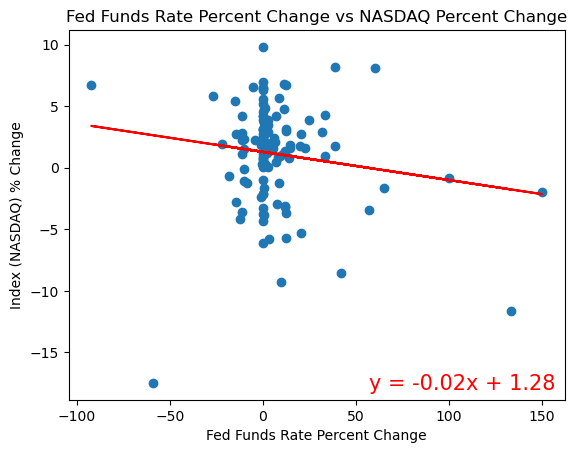

In [63]:
# Plot out Fed Funds Rate Percent Change vs NASDAQ Percent Change

# Define Plot Values
x_values = ci_df['Fed Funds Rate Percent Change']
y_values = ci_df['NASDAQ Percent Change']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate Percent Change')
plt.ylabel('Index (NASDAQ) % Change')
plt.title('Fed Funds Rate Percent Change vs NASDAQ Percent Change')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(57, -18),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

---Explanation--

<div class="alert alert-block alert-info">
<b>Fed Funds Rate vs DowJones
</div>

The r-squared is: 0.12462348942146459


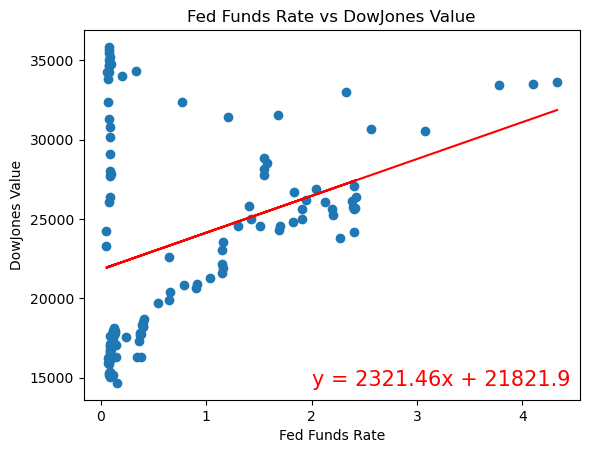

In [64]:
# Plot out Fed Funds Rate vs DowJones Value

# Define Values
x_values = ci_df['Fed Funds Rate']
y_values = ci_df['DowJones Value']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate')
plt.ylabel('DowJones Value')
plt.title('Fed Funds Rate vs DowJones Value')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 14500),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.037807825537410515


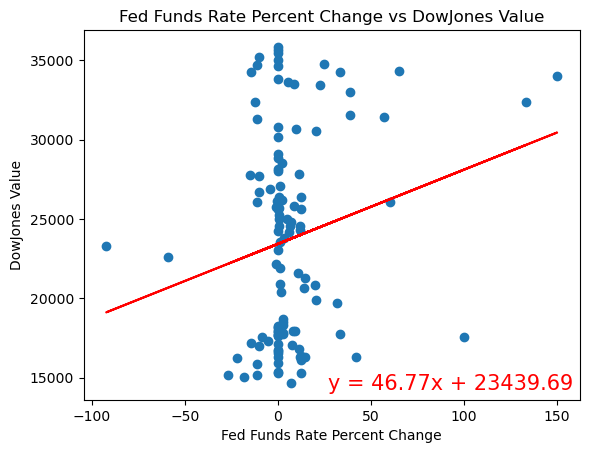

In [65]:
# Plot out Fed Funds Rate Percent Change vs DowJones Value

# Define Plot Values
x_values = ci_df['Fed Funds Rate Percent Change']
y_values = ci_df['DowJones Value']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate Percent Change')
plt.ylabel('DowJones Value')
plt.title('Fed Funds Rate Percent Change vs DowJones Value')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27, 14250),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 3.0384630396419523e-05


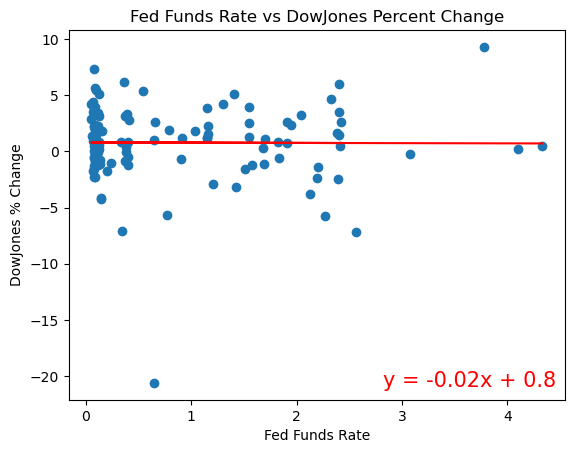

In [66]:
# Plot out Fed Funds Rate vs DowJones Percent Change

# Define Plot Values
x_values = ci_df['Fed Funds Rate']
y_values = ci_df['DowJones Percent Change']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate')
plt.ylabel('DowJones % Change')
plt.title('Fed Funds Rate vs DowJones Percent Change')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.82,-21),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

The r-squared is: 0.0004132840577885223


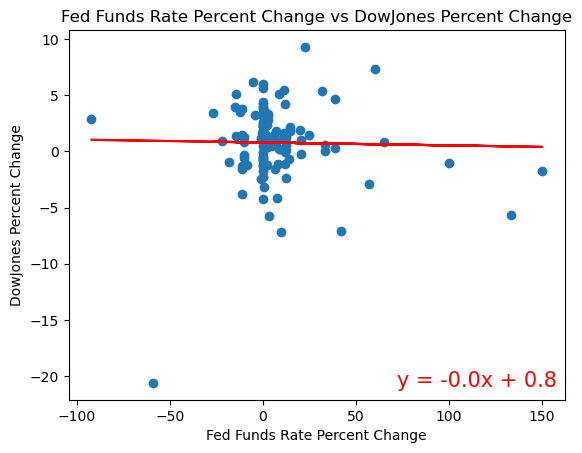

In [67]:
# Plot out Fed Funds Rate Percent Change vs NASDAQ Percent Change

# Define Plot Values
x_values = ci_df['Fed Funds Rate Percent Change']
y_values = ci_df['DowJones Percent Change']

# Regression Line Creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build Plot
plt.scatter(x_values,y_values)
plt.xlabel('Fed Funds Rate Percent Change')
plt.ylabel('DowJones Percent Change')
plt.title('Fed Funds Rate Percent Change vs DowJones Percent Change')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72, -21),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Plot
plt.show()

---Explanation--

### Independent T-Tests 

<div class="alert alert-block alert-info">
<b>Fed Funds Rate vs S&P 500
</div>

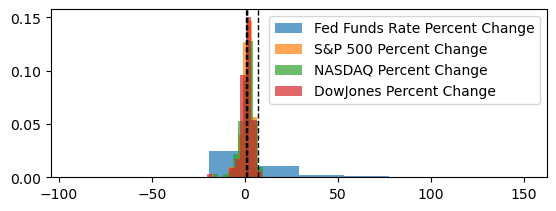

In [68]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)

plt.hist(ci_df['Fed Funds Rate Percent Change'], 10, density=True, alpha=0.7, label="Fed Funds Rate Percent Change")
plt.hist(ci_df['S&P 500 Percent Change'], 10, density=True, alpha=0.7, label="S&P 500 Percent Change")
plt.hist(ci_df['NASDAQ Percent Change'], 10, density=True, alpha=0.7, label="NASDAQ Percent Change")
plt.hist(ci_df['DowJones Percent Change'], 10, density=True, alpha=0.7, label="DowJones Percent Change")

plt.axvline(ci_df['Fed Funds Rate Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ci_df['S&P 500 Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ci_df['NASDAQ Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ci_df['DowJones Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

plt.show()

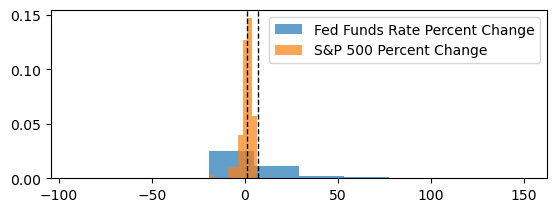

In [69]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)

plt.hist(ci_df['Fed Funds Rate Percent Change'], 10, density=True, alpha=0.7, label="Fed Funds Rate Percent Change")
plt.hist(ci_df['S&P 500 Percent Change'], 10, density=True, alpha=0.7, label="S&P 500 Percent Change")

plt.axvline(ci_df['Fed Funds Rate Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ci_df['S&P 500 Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.legend()  
plt.show()

In [70]:
SP500_Ttest = stats.ttest_ind(ci_df['Fed Funds Rate Percent Change'], ci_df['S&P 500 Percent Change'], equal_var=False)
SP500_Correlation = ci_df['Fed Funds Rate Percent Change'].corr(ci_df['S&P 500 Percent Change'])
print(SP500_Ttest)
print("The Correlation Coefficient is", SP500_Correlation)


Ttest_indResult(statistic=2.3401496829413113, pvalue=0.020918626168423198)
The Correlation Coefficient is -0.08305477059254529


<div class="alert alert-block alert-success">
<b>Decision:</b> Since our pvalue is less than .05 we reject our null hypothesis. With a correlation coefficent of -.08 there is an extremely weak negative correlation. The Fed Fund Rate does not largely impact changes in the S&P 500. 
</div>

<div class="alert alert-block alert-info">
<b>Fed Funds Rate vs NASDAQ
</div>

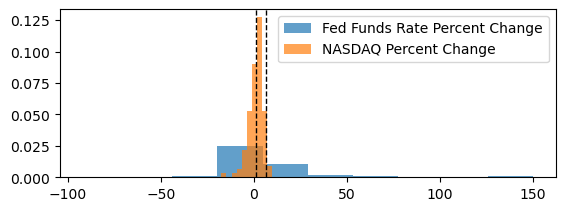

In [74]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)

plt.hist(ci_df['Fed Funds Rate Percent Change'], 10, density=True, alpha=0.7, label="Fed Funds Rate Percent Change")
plt.hist(ci_df['NASDAQ Percent Change'], 10, density=True, alpha=0.7, label="NASDAQ Percent Change")

plt.axvline(ci_df['Fed Funds Rate Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ci_df['NASDAQ Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

plt.show()

In [102]:
NASDAQ_Ttest = stats.ttest_ind(ci_df['Fed Funds Rate Percent Change'], ci_df['NASDAQ Percent Change'], equal_var=False)
NASDAQ_Correlation = ci_df['Fed Funds Rate Percent Change'].corr(ci_df['NASDAQ Percent Change'])
print(NASDAQ_Ttest)
print("The Correlation Coefficient is", NASDAQ_Correlation)

Ttest_indResult(statistic=2.2223905306419343, pvalue=0.02809340425539805)
The Correlation Coefficient is -0.15026512401901945


<div class="alert alert-block alert-success">
<b>Decision:</b> Since our pvalue is less than .05 we accept our null hypothesis. With a correlation coefficent of -.15 there is a very weak negative correlation. The Fed Fund Rate does not largely impact changes in the NASDAQ. 
</div>

<div class="alert alert-block alert-info">
<b>Fed Funds Rate vs DowJones
</div>

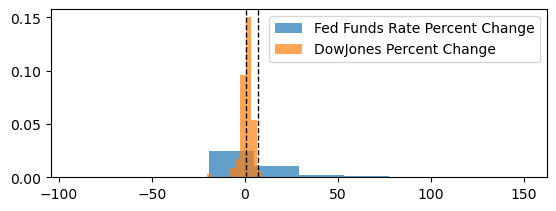

In [76]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)

plt.hist(ci_df['Fed Funds Rate Percent Change'], 10, density=True, alpha=0.7, label="Fed Funds Rate Percent Change")
plt.hist(ci_df['DowJones Percent Change'], 10, density=True, alpha=0.7, label="DowJones Percent Change")

plt.axvline(ci_df['Fed Funds Rate Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(ci_df['DowJones Percent Change'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

plt.show()

In [103]:
DowJones_Ttest = stats.ttest_ind(ci_df['Fed Funds Rate Percent Change'], ci_df['DowJones Percent Change'], equal_var=False)
DowJones_Correlation = ci_df['Fed Funds Rate Percent Change'].corr(ci_df['DowJones Percent Change'])
print(DowJones_Ttest)
print("The Correlation Coefficient is", DowJones_Correlation)

Ttest_indResult(statistic=2.3694005804854568, pvalue=0.019402526667183336)
The Correlation Coefficient is -0.020329389016606532


<div class="alert alert-block alert-success">
<b>Decision:</b> Since our pvalue is less than .05 we accept our null hypothesis. With a correlation coefficent of -.02 there is an extremely weak negative correlation. The Fed Fund Rate does not largely impact changes in the DowJones. 
</div>

#### Summary

Overall, we accept the null hypothesis: the Federal Funds rate does not impact the growth rate of the NASDAQ.